<h1>Visualising Austin Crime Data and locating Austin restaurants using Foursquare</h1>

In [1]:
import pandas as pd
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
from folium.plugins import HeatMap
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
print('Done')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Done


I will statr with Austin Crime Data. Data need to be leaned and prepared for the visialization. Tt will help to get a better understanding of the Austin Crime Dataset.

This dataset reflects reported incidents of crime that occurred in the City of Austin from 2015 to 2018. Data is extracted from the https://data.austintexas.gov .

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}  
</style>
</head>
    
<body>
<table style="width:100%">
  <tr>
    <th>Field </th>
    <th>Description</th> 
  </tr>
    
  <tr>
    <td>Incident Number </td>
    <td>Incident report number</td>
  </tr>
    
  <tr>
    <td>Highest Offense Description </td>
    <td>Description</td>
  </tr>
    
  <tr>
    <td>Highest Offense Code </td>
    <td>Code</td>
  </tr>
    
  <tr>
    <td>Family Violence </td>
    <td>Incident involves family violence? Y = yes, N = no</td>
  </tr>
    
  <tr>
    <td>Occurred Date Time </td>
    <td>Date and time (combined) incident occurred</td>
  </tr>
 
  <tr>
    <td>Occurred Date </td>
    <td>Date the incident occurred</td>
  </tr>
    
  <tr>
    <td>Occurred Time </td>
    <td>Time the incident occurred</td>
  </tr>
    
  <tr>
    <td>Report Date Time </td>
    <td>Date and time (combined) incident was reported</td>
  </tr>    
   
   <tr>
    <td>Report Date </td>
    <td>Date the incident was reported </td>
  </tr>   
    
   <tr>
    <td>Report Time </td>
    <td>Time the incident was reported </td>
  </tr>
    
   <tr>
    <td>Location Type </td>
    <td>General description of the premise where the incident occurred </td>
  </tr>

   <tr>
    <td>Address </td>
    <td>Incident location </td>
  </tr>

   <tr>
    <td>Zip code </td>
    <td>Zip code where incident occurred </td>
  </tr>
    
   <tr>
    <td>Council District </td>
    <td>Austin city council district where the incident occurred </td>
  </tr>    
    
   <tr>
    <td>APD Sector </td>
    <td>APD sector where incident occurred </td>
  </tr>

   <tr>
    <td>APD District </td>
    <td>APD district where incident occurred </td>
  </tr>

   <tr>
    <td>PRA </td>
    <td>APD police reporting area where incident occurred </td>
  </tr>
    
   <tr>
    <td>Census </td>
    <td>Tract Census tract where incident occurred  </td>
  </tr>
   
   <tr>
    <td>Clearance Status </td>
    <td>How/whether crime was solved (see Clearance lookup) </td>
  </tr>
    
   <tr>
    <td>Clearance Date </td>
    <td>Date crime was solved </td>
  </tr>
    
   <tr>
    <td>UCR Category </td>
    <td>Code for the most serious crimes identified by the FBI as part of
its Uniform Crime Reporting program </td>
  </tr>
    
   <tr>
    <td>Category Description </td>
    <td>Description for the most serious crimes identified by the FBI as
part of its Uniform Crime Reporting program </td>
  </tr>
    
   <tr>
    <td>X-coordinate </td>
    <td>X-coordinate where the incident occurred </td>
  </tr>

   <tr>
    <td>Y-coordinate </td>
    <td>Y-coordinate where the incident occurred </td>
  </tr>
    
   <tr>
    <td>Latitude </td>
    <td>Latitude where incident occurred </td>
  </tr>
    
   <tr>
    <td>Longitude </td>
    <td>Longitude where the incident occurred </td>
  </tr>
    
   <tr>
    <td>Location </td>
    <td>3rd party generated spatial column </td>
  </tr>
    
   </table>
</body>
</html>


<h2>Import the Austin Crime DataSet</h2>

The full dataset, 2015 to 2018 contains over 441202 rows. This makes processing the dataset difficult and time consuming. Only the 2018 data, will be used. Also, Not all of the columns are required:

     The following columns are removed:
        Family Violence
        Occurred Date
        Occurred Time
        Report Date Time
        Report Date
        Report Time
        Census Tract
        Clearance Status
        Category Description
        UCR Category
        X COORDINATE
        Y COORDINATE
        LOCATION



In [5]:
crimes = pd.read_csv('Crime_Reports_2018.csv')
crimes.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20185000070,THEFT,600,N,01/01/2018 05:00:00 PM,01/01/2018,1700,01/01/2018 05:27:00 PM,01/01/2018,1727,...,NaN,N,01/02/2018,23H,Theft,3113952.0,3113952.0,30.266100,-97.744003,"(30.26610034, -97.74400318)"
1,20185000027,IDENTITY THEFT,4022,N,09/30/2017 12:00:00 PM,09/30/2017,1200,01/01/2018 10:40:00 AM,01/01/2018,1040,...,NaN,N,01/02/2018,NaN,NaN,3133328.0,3133328.0,30.284343,-97.682110,"(30.28434299, -97.68210979)"
2,20185000082,RUNAWAY CHILD,4100,N,01/01/2018 07:45:00 PM,01/01/2018,1945,01/01/2018 08:16:00 PM,01/01/2018,2016,...,NaN,N,03/14/2018,NaN,NaN,3110391.0,3110391.0,30.243872,-97.755879,"(30.24387238, -97.75587947)"
3,201810723,ASSAULT BY CONTACT FAM/DATING,902,Y,01/01/2018 03:56:00 AM,01/01/2018,356,01/01/2018 04:45:00 AM,01/01/2018,445,...,NaN,N,01/04/2018,NaN,NaN,3099634.0,3099634.0,30.445491,-97.784633,"(30.44549079, -97.78463319)"
4,201811617,PUBLIC INTOXICATION,2300,N,01/01/2018 07:45:00 PM,01/01/2018,1945,01/01/2018 08:59:00 PM,01/01/2018,2059,...,NaN,C,01/01/2018,NaN,NaN,3128613.0,3128613.0,30.382900,-97.694358,"(30.38289967, -97.69435755)"


In [6]:
crimes.shape

(102577, 27)

In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Incident Number              102577 non-null  int64  
 1   Highest Offense Description  102577 non-null  object 
 2   Highest Offense Code         102577 non-null  int64  
 3   Family Violence              102577 non-null  object 
 4   Occurred Date Time           102577 non-null  object 
 5   Occurred Date                102577 non-null  object 
 6   Occurred Time                102577 non-null  int64  
 7   Report Date Time             102577 non-null  object 
 8   Report Date                  102577 non-null  object 
 9   Report Time                  102577 non-null  int64  
 10  Location Type                101935 non-null  object 
 11  Address                      102577 non-null  object 
 12  Zip Code                     101698 non-null  float64
 13 

In [11]:
crimes.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [17]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crimes_a = crimes [['Incident Number',
                      'Highest Offense Description',
                      'Occurred Date Time', 
                      'Category Description',
                      'Latitude',
                      'Longitude']]

crimes_a.columns = ['IncidentNumber','HighestOffense','Date','Category','LATITUDE','LONGITUDE']

In [14]:
# Download csv
crimes_a.to_csv("CRIME_AUSTIN_2018.csv", index=False)

In [15]:
df = pd.read_csv('CRIME_AUSTIN_2018.csv')

let's check head and tail

In [18]:
df.head()

,IncidentNumber,HighestOffense,Date,Category,LATITUDE,LONGITUDE
0,20185000070,THEFT,01/01/2018 05:00:00 PM,Theft,30.266100,-97.744003
1,20185000027,IDENTITY THEFT,09/30/2017 12:00:00 PM,NaN,30.284343,-97.682110
2,20185000082,RUNAWAY CHILD,01/01/2018 07:45:00 PM,NaN,30.243872,-97.755879
3,201810723,ASSAULT BY CONTACT FAM/DATING,01/01/2018 03:56:00 AM,NaN,30.445491,-97.784633
4,201811617,PUBLIC INTOXICATION,01/01/2018 07:45:00 PM,NaN,30.382900,-97.694358


In [20]:
df.tail()

,IncidentNumber,HighestOffense,Date,Category,LATITUDE,LONGITUDE
102572,20183650125,DRIVING WHILE INTOX / FELONY,12/31/2018 02:22:00 AM,NaN,30.198057,-97.642594
102573,20183651424,FAMILY DISTURBANCE,12/31/2018 07:42:00 PM,NaN,30.376992,-97.710853
102574,20183651328,RUNAWAY CHILD,12/31/2018 07:15:00 PM,NaN,30.196802,-97.756765
102575,20183651230,FAMILY DISTURBANCE,12/31/2018 06:20:00 PM,NaN,30.212695,-97.801523
102576,20185052614,THEFT,12/31/2018 02:00:00 AM,Theft,30.266624,-97.738609


In [21]:
df.shape

(102577, 6)

Clean up the data since it's still too big and prepare for vizualization.

    Change the date of occurance field to a date / time object
    Add new columns for:
        Hour
        Day
        Month
        Year
        etc.
    Verify that all rows have valid data
    Drop Category column since it contains a lot of NaN.
    Also, remove NaN in Lat,Long.


In [24]:
df.isnull().values.any()

True

In [25]:
df.isnull().sum().sum()

70271

In [27]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()


In [31]:
df.drop(['category'], axis=1, inplace = True)

In [32]:
df.head()

,incidentnumber,highestoffense,date,latitude,longitude
0,20185000070,THEFT,01/01/2018 05:00:00 PM,30.266100,-97.744003
1,20185000027,IDENTITY THEFT,09/30/2017 12:00:00 PM,30.284343,-97.682110
2,20185000082,RUNAWAY CHILD,01/01/2018 07:45:00 PM,30.243872,-97.755879
3,201810723,ASSAULT BY CONTACT FAM/DATING,01/01/2018 03:56:00 AM,30.445491,-97.784633
4,201811617,PUBLIC INTOXICATION,01/01/2018 07:45:00 PM,30.382900,-97.694358


In [34]:
df.isnull().sum().sum()

4698

In [35]:
df = df.dropna()

In [36]:
df.shape

(100228, 5)

In [37]:
df.head()

,incidentnumber,highestoffense,date,latitude,longitude
0,20185000070,THEFT,01/01/2018 05:00:00 PM,30.266100,-97.744003
1,20185000027,IDENTITY THEFT,09/30/2017 12:00:00 PM,30.284343,-97.682110
2,20185000082,RUNAWAY CHILD,01/01/2018 07:45:00 PM,30.243872,-97.755879
3,201810723,ASSAULT BY CONTACT FAM/DATING,01/01/2018 03:56:00 AM,30.445491,-97.784633
4,201811617,PUBLIC INTOXICATION,01/01/2018 07:45:00 PM,30.382900,-97.694358


In [38]:
df.dtypes

incidentnumber      int64
highestoffense     object
date               object
latitude          float64
longitude         float64
dtype: object

In [39]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.




Now that the date date of the crime is a real date time object let's add new columns for the hour, day, month and year of the crime etc:

    Hour
    Day Name
    Day of week (Tuesday is the first day)
    Month Name
    Month Number
    Year
    Year and Month



In [42]:
# Add new columns to the dataframe to allow hourly, daily & monthly analysis
df['hour'] = df['date'].dt.hour
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.dayofweek + 1
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [43]:
# Verify that all rows have valid data
df.isna().sum()

incidentnumber    0
highestoffense    0
date              0
latitude          0
longitude         0
hour              0
day_name          0
day               0
month_name        0
month             0
year              0
year_month        0
dtype: int64

In [44]:
df.reset_index(inplace=True)

In [45]:
df.head()

,index,incidentnumber,highestoffense,date,latitude,longitude,hour,day_name,day,month_name,month,year,year_month
0,0,20185000070,THEFT,2018-01-01 17:00:00,30.266100,-97.744003,17,Monday,1,January,1,2018,2018-01
1,1,20185000027,IDENTITY THEFT,2017-09-30 12:00:00,30.284343,-97.682110,12,Saturday,6,September,9,2017,2017-09
2,2,20185000082,RUNAWAY CHILD,2018-01-01 19:45:00,30.243872,-97.755879,19,Monday,1,January,1,2018,2018-01
3,3,201810723,ASSAULT BY CONTACT FAM/DATING,2018-01-01 03:56:00,30.445491,-97.784633,3,Monday,1,January,1,2018,2018-01
4,4,201811617,PUBLIC INTOXICATION,2018-01-01 19:45:00,30.382900,-97.694358,19,Monday,1,January,1,2018,2018-01


In [46]:
# Download csv
df.to_csv("CRIME_AUSTIN_2018_2.csv", index=False)

<h1>Visualisation,</h1>


<h3>Number of Crimes per month </h3>

In [48]:
df_crimes = pd.read_csv('CRIME_AUSTIN_2018_2.csv')

Text(0.0, 1.0, 'Count of Cases Per Month')

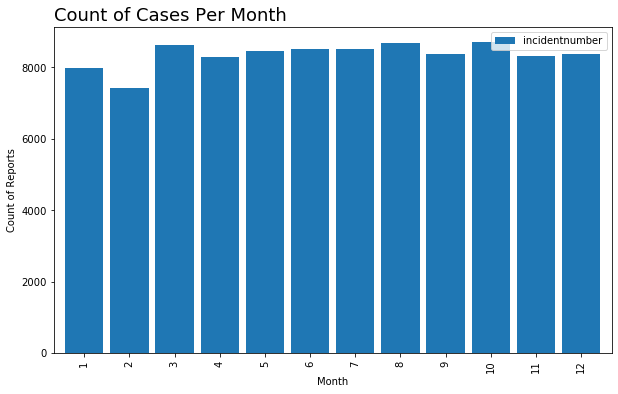

In [52]:
# Group the Crimes per month and produce a bar chart
df_crimes.groupby('month').count().plot(y = 'incidentnumber', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Reports')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)



Huge spike of crime reports from February to March. Spike could be caused by March 11 = SXSW

<h3>Number of crimes occuring on each day</h3>

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a SUNDAY]')

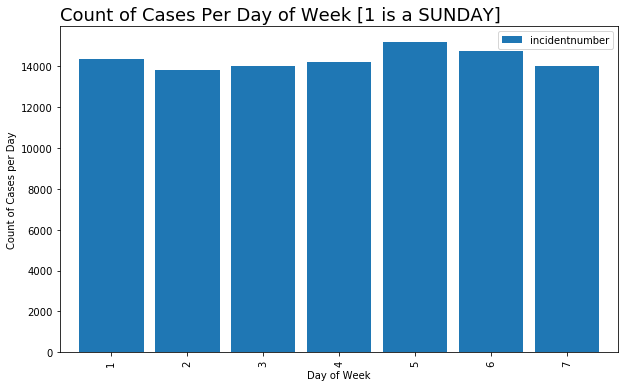

In [54]:
# Group the Crimes per day and produce a bar chart
df_crimes.groupby('day').count().plot(y = 'incidentnumber',
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      colormap='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a SUNDAY]', loc='left', fontsize=18)



There is a small increase in crime reported at the weekend, Saturday and Sunday, but nothing that could be considered significant.

<h3>Number of crimes occuring in each hour</h3>

Text(0.0, 1.0, 'Count of Cases Per Hour]')

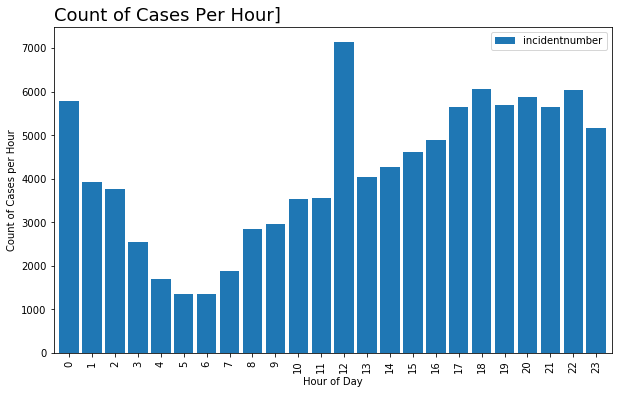

In [56]:
# Group the Crimes per hour and produce a bar chart
df_crimes.groupby('hour').count().plot(y = 'incidentnumber',
                                       kind='bar',
                                       figsize=(10,6),
                                       width=0.85,
                                       colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after seven in the morning. There appears to be a huge spike around midday.


In [57]:
# Number of unique Crime categories bases on the Primary Description
df_crimes.highestoffense.nunique()

282

In [59]:
# What Crimes are the 10 most commonly occuring ones 
df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense'], as_index=False).count().sort_values(
    'incidentnumber', ascending=False).head(10)

,highestoffense,incidentnumber
117,FAMILY DISTURBANCE,10526
38,BURGLARY OF VEHICLE,10502
232,THEFT,9327
56,CRIMINAL MISCHIEF,4629
25,ASSAULT W/INJURY-FAM/DATE VIOL,3346
83,DISTURBANCE - OTHER,3225
237,THEFT BY SHOPLIFTING,2984
134,HARASSMENT,2648
101,DWI,2620
27,AUTO THEFT,2410


In [60]:
# What Crimes are the 3 most commonly occuring ones 
df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense'], as_index=False).count().sort_values(
    'incidentnumber', ascending=False).head(3)



,highestoffense,incidentnumber
117,FAMILY DISTURBANCE,10526
38,BURGLARY OF VEHICLE,10502
232,THEFT,9327


In [62]:
# Create a list of the 3 most commonly occuring crimes
top_ten_crimes = df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense']).count().sort_values('incidentnumber', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df_crimes[['highestoffense', 'incidentnumber']].groupby(
    ['highestoffense']).count().sort_values('incidentnumber', ascending=False)[:3].axes[0].tolist()

In order to get a better understanding of the top three crimes lets first create smaller dataframe the only contains these top crimes. Next we'll visualise these crimes using area charts.


Text(0.0, 1.0, 'Count of Top 3 Cases Per Month')

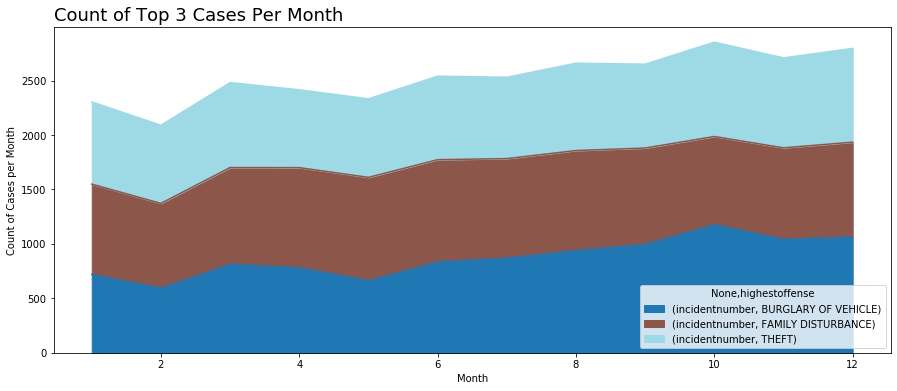

In [63]:
# Create a new data frame with just the top 10 crimes
df_top10_crimes = df_crimes[df_crimes['highestoffense'].isin(top_ten_crimes)].copy()

# Create a new data frame with just the top 3 crimes
df_top3_crimes = df_crimes[df_crimes['highestoffense'].isin(top_three_crimes)].copy()

# Create a pivot area chart of the crimes per month
df_top3_crimes[['incidentnumber', 'highestoffense', 'month']].pivot_table(
    index='month', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases per Month')
plt.title('Count of Top 3 Cases Per Month', loc='left', fontsize=18)

It would appear that crimes peak in the Winter months and then fall off in Autumn. Now look per day.

Text(0.0, 1.0, 'Count of Top 3 Cases Per Day')

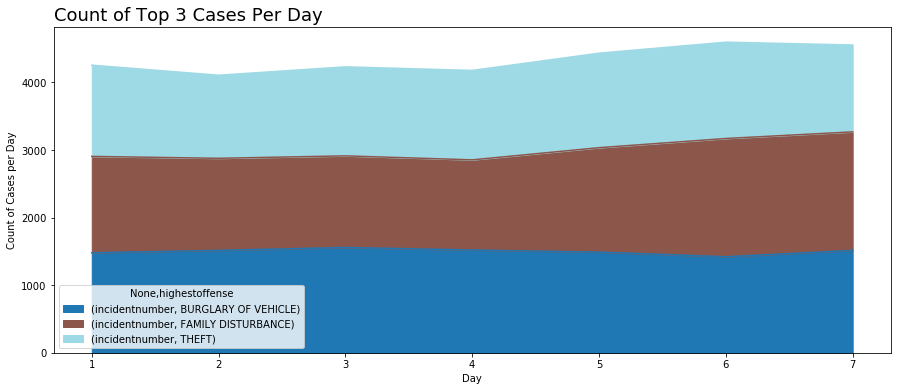

In [65]:
# Create a pivot area chart of the crimes per day
df_top3_crimes[['incidentnumber', 'highestoffense', 'day']].pivot_table(
    index='day', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Top 3 Cases Per Day', loc='left', fontsize=18)

Text(0.0, 1.0, 'Count of Top 3 Cases Per Hour')

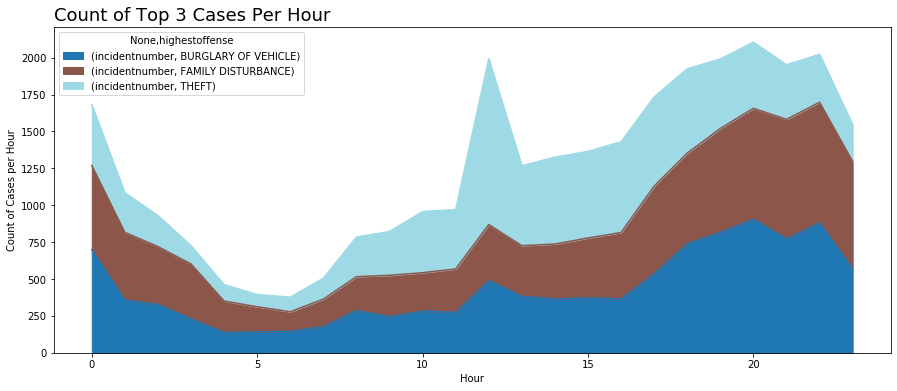

In [66]:
# Create a pivot area chart of the crimes per hour
df_top3_crimes[['incidentnumber', 'highestoffense', 'hour']].pivot_table(
    index='hour', 
    columns='highestoffense', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Top 3 Cases Per Hour', loc='left', fontsize=18)




It would appear that 6:00 am in the morning is the safest time in Austin while 12 pm is the most dangerous.

<h1>Create a folium map </h1>

In [68]:
#Colour each of the top 10 crimes with a different and plot on a Folium map.
# Create a list of 10 colours for top 10 crimes from earlier
colors10 = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours10 = dict(zip(top_ten_crimes, colors10))

# Create a list of 3 colours for top 3 crimes from earlier
colors3 = [
    'red',
    'blue',
    'green'
]

# Create a dictionary of colours to map to the crimes
dict_colours3 = dict(zip(top_three_crimes, colors3))

In [84]:
# Add the colours colums to the df_top_crimes DataFrame
df_top10_crimes['colour'] = df_top10_crimes.highestoffense.map(dict_colours10)

# Filter the top 10 crimes dataframe to extract August only
df_top10_crimes_october = df_top10_crimes[df_top10_crimes.month_name == 'October']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top10_crimes_october.to_csv("CRIME_AUSTIN_map.csv", index=False)

# Add the colours colums to the df_top_crimes DataFrame
df_top3_crimes['colour'] = df_top3_crimes.highestoffense.map(dict_colours3)

# Filter the top 10 crimes dataframe to extract October only
df_top3_crimes_october = df_top3_crimes[df_top3_crimes.month_name == 'October']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top3_crimes_october.to_csv("CRIME_AUSTIN_map2.csv", index=False)

In [85]:
# Create Austin map
austin_map = folium.Map(location=[ 30.2672,  -97.74 ], zoom_start=11)

austin_map

incidents = folium.map.FeatureGroup()

for lat, lng, col in zip(df_top10_crimes_august.latitude, 
                         df_top10_crimes_august.longitude, 
                         df_top10_crimes_august.colour):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, 
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

austin_map.add_child(incidents)

In [86]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

In [ ]:
mc = MarkerCluster()

austin_cluster = folium.Map(location = [ 30.2672,  -97.74 ], zoom_start=11)

for row in df_top10_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.highestoffense))
 
austin_cluster.add_child(mc)
austin_cluster

In [ ]:
austin_heatmat = folium.Map(location=[ 30.2672,  -97.74 ], zoom_start=11) 

heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top10_crimes_october.iterrows()]

HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

austin_heatmat
